<div class="alert alert-box alert-info">
    <h2 style="margin:0px"> Linear Regression on Boston housing using gradient descent from scratch </h2> 
    
 </div>

- We perform linear regression from scratch and compare with linear model from sklearn library
- We are using the following libraries

In [29]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")#ignoring the warnings for presentation

<div class="alert alert-box alert-info">
    <h3 style="margin:0px"> Loading dataset from sklearn.datasets</h3> 
    
 </div>

https://scikit-learn.org/0.15/modules/generated/sklearn.datasets.load_boston.html

In [30]:
data=load_boston()

In [31]:
df=pd.DataFrame(data["data"],columns=data["feature_names"])

In [32]:
df["Price"]=data["target"]

In [33]:
df.shape

(506, 14)

<div class="alert alert-box alert-success">
    <h3 style="margin:0px"> We have 506 values and 13 independent features "Price" is dependent feature </h3> 
    
 </div>

<div>
    <h2 style="margin:75px"></h2>
</div>

In [34]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [35]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

<div class="alert alert-box alert-success">
    <h3 style="margin:0px"> There are no null values in the dataframe </h3> 
    
 </div>

<div>
    <h2 style="margin:120px"></h2>
</div>

<div class="alert alert-box alert-info">
    <h2 style="margin:0px"> Finding the correlation of features W.R.T Price feature </h2> 
    
 </div>

In [37]:
df.corr()["Price"]

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Price      1.000000
Name: Price, dtype: float64

<div class="alert alert-box alert-info">
    <h2 style="margin:0px"> Spliting data for training and testing </h2> 
    
 </div>

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.3,train_size=0.7,random_state=9)

In [42]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
217,0.07013,0.0,13.89,0.0,0.550,6.642,85.1,3.4211,5.0,276.0,16.4,392.78,9.69
25,0.84054,0.0,8.14,0.0,0.538,5.599,85.7,4.4546,4.0,307.0,21.0,303.42,16.51
235,0.33045,0.0,6.20,0.0,0.507,6.086,61.5,3.6519,8.0,307.0,17.4,376.75,10.88
62,0.11027,25.0,5.13,0.0,0.453,6.456,67.8,7.2255,8.0,284.0,19.7,396.90,6.73
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43


<div>
    <h2 style="margin:30px"></h2>
</div>

In [43]:
y_train.head()

217    28.7
25     13.9
235    24.0
62     22.2
6      22.9
Name: Price, dtype: float64

<div class="alert alert-box alert-info">
    
 <h2 style="margin:0px">Converting values from range of (-1,1) using StandardScaler so our model could reach minima faster</h2> 
    
 </div>

In [48]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

<div class="alert alert-box alert-info">
    <h2 style="margin:0px"> Cost Function </h2> 
    
 </div>

<img src="costfun.png" alt="" width="500" height="500"> 


In [49]:
def cost_Fun(x,y,b,w):
    m=len(y)
    return np.sum(((x.dot(w)+b)-y)**2)/(2*m)

<div>
    <h2 style="margin:30px"></h2>
</div>

 <div class="alert alert-box alert-info">
    <h2 style="margin:0px"> Gradient Descent Function </h2> 
    
 </div>

<img src="gradient.png" alt="" width="500" height="500"> 

<h2 style="font-family:courier;color:blue;">h&#920(x(i)) is &#920 1 + &#920 2 * x the equation of straight line</h2>
<h2 style="font-family:courier;color:blue;margin:0px">&#920 2 is weight</h2>
<h2 style="font-family:courier;color:blue;margin:0px">&#920 1 is bias</h2>

In [53]:
def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z-y
        #The partial derivative ∂f∂x(0i,0j) is the slope of the tangent line to this curve at the point where x=0i
        ##.T gives the transpose of the matrix
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = cost_Fun(x, y, b, w)
        cost_list[epoch] = cost
        
        if (epoch%(epochs/10)==0):
            print(f"Cost at {epoch} is:",cost)
        
    return w, b, cost_list

 <div style="font-size: 18px;font-weight: bold;" class="alert alert-box alert-info">
    <ul><h3 style="margin:0px">Gradient Descent Function</h3>
       <br/>
        <li>Iniatilizing weights and bias to 0</li>
        <li> Learning rate is 0.01</li>
        <li> Eposch or iterations to 2000</li>
       
    
 </ul>
    
    
    
 </div>

In [100]:
weight = np.zeros(X_train.shape[1])
bias=0
w,b,cost_list=GradientDescent(X_train,y_train,weight,bias,0.01,2000)

Cost at 0 is: 279.2800770403807
Cost at 200 is: 16.807547944718138
Cost at 400 is: 12.092160202093243
Cost at 600 is: 11.848362350201391
Cost at 800 is: 11.756087357934243
Cost at 1000 is: 11.701919592797472
Cost at 1200 is: 11.6676422290539
Cost at 1400 is: 11.644846045597305
Cost at 1600 is: 11.629072028591196
Cost at 1800 is: 11.617817392353636


In [65]:
display(w,b,cost_list[-3:])

array([-0.99430011,  0.91144506,  0.13550378,  0.58422094, -1.71586428,
        2.72507616, -0.01107414, -2.83149147,  1.92665587, -1.34979725,
       -1.91660828,  0.72980929, -3.78539905])

22.14237284008794

[11.609708657616723, 11.609673360720128, 11.609638116384843]

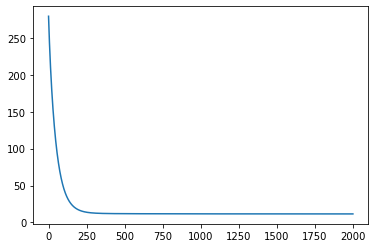

In [56]:
plt.plot(cost_list)

<div>
    <h2 style="margin:75px"></h2>
</div>

 <div class="alert alert-box alert-info">
    <h2 style="margin:0px"> Predicting for test data </h2> 
    
 </div>

In [59]:
def predict(X, w, b):
    return X.dot(w) + b

In [60]:
y_pred=predict(X_test,w,b)

 <div class="alert alert-box alert-info">
    <h2 style="margin:0px">Calculating r2score</h2> 
    
 </div>

In [61]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2

In [62]:
r2score(y_pred,y_test)

0.7809281191771755

<h2 style="font-family:courier;color:blue;">Our model can predict with an r2 score of 0.78</h2>

<div>
    <h2 style="margin:230px"></h2>
</div>

 <div class="alert alert-box alert-info">
    <h2 style="margin:0px"> Linear regression using sklearn linearRegression </h2> 
    
 </div>

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.3,train_size=0.7,random_state=9)

In [70]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
linear_regressor=LinearRegression()
from sklearn.model_selection import cross_val_score
mse=cross_val_score(linear_regressor,X_train,y_train,scoring="neg_mean_squared_error",cv=5)
print(mse.mean())
linear_regressor.fit(X_train,y_train)

-26.098177240175033


In [95]:
linear_predicted=linear_regressor.predict(X_test)

In [96]:
from sklearn.metrics import r2_score
print(r2_score(y_test,linear_predicted))

0.782612607427101


 <div class="alert alert-box alert-success">
    <h2 style="margin:0px"> Similar r2 score 0.78 and 0.78</h2> 
    
 </div>